# iGEDS

Este notebook está basado en el trabajo de Miguel Nuñez, el cual contiene los datos originados por la iniciativa iGEDS, en particular datos a nivel internacional de 106 países que describen 5 pilares principales:
*   Foundational Institutions
*   Innovation component
*   Entrepreneurship component
*   Comparative Advantage
*   Social Impact
*   Economic Impact

En este código

*   Re-escalan todas las métricas a valores entre 1-5 
*   Imputan valores faltantes para algunos paises 
*   Visualiza la distribución de las métricas por país.

In [113]:
! pip install pingouin
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import scipy.stats as stats

Primeras 5 entradas de los datos originales:

In [114]:
df = pd.read_csv('../iEcosystems (106 countries dataset) - Indicators.csv')
#df

Proceso de re-escalamiento:

In [115]:
#primero vamos a remover los peores (resp. mejores) desempeños 
minimums = df.iloc[106,3:].astype(float).values
maximums = df.iloc[107,3:].astype(float).values
df = df.drop(axis=0, index=[106,107])
df.set_index('Country', inplace=True)
#df

In [116]:
df_scaled = df.copy()
df_scaled = df_scaled.drop('Region', axis=1)
df_scaled = df_scaled.drop('Development Stage', axis=1)

columns = df_scaled.columns.values.tolist()

for column, minval, maxval in zip(columns, minimums, maximums):
    df_scaled[column] = df_scaled[column].apply(lambda x: (x-minval)/(maxval-minval))
    df_scaled[column] = df_scaled[column].apply(lambda x: 1+4*x)


df_scaled

,1.01 Ease of doing business (WB),1.02 Starting a business (WB),1.03 Paying taxes (WB),1.04 Resolving Insolvency (WB),1.05 Enforcing contracts (WB),1.06 Property Rights (IEF),1.07 Government Integrity (IEF),1.08 Labor Freedom (IEF),1.09 Trade freedom (IEF),1.10 Corruption Perceptions Index (TI),...,5.06 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities),5.07 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities),5.08 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production),6.01 GDP per capita (IMF),6.02 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth),6.03 Annual growth rate of GDP (WB),6.04 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth),6.05 FDI inward flow as % of GDP (UNCTAD),GNI per capita (WB),SEDA Score (BCG)
Country,,,,,,,,,,,,,,,,,,,,,
Albania,3.708,4.672,3.608,3.708,3.140,3.284,2.552,3.084,4.536,2.44,...,NaN,4.342004,1.846966,1.239117,3.832817,2.676190,2.549550,3.394919,1.236727,3.172
Algeria,2.944,4.120,3.156,2.968,3.192,2.516,2.132,3.020,3.648,2.40,...,NaN,3.400593,1.733379,1.188203,2.575851,2.142857,3.198198,2.515012,1.174866,2.724
Argentina,3.360,4.216,2.972,2.600,3.300,3.020,2.988,2.860,3.768,2.60,...,4.471927,4.670683,1.955622,1.546048,3.266254,1.000000,3.522523,2.690531,1.527034,3.232
Armenia,3.980,4.844,4.260,2.784,3.788,3.428,2.736,3.900,4.224,2.40,...,4.611533,3.655628,1.944063,1.183932,4.938080,4.733333,1.846847,2.651270,1.209450,3.012
Australia,4.248,4.864,4.428,4.156,4.160,4.312,4.572,4.360,4.528,4.08,...,NaN,4.923434,4.655468,3.711914,3.173375,2.561905,4.027027,2.903002,3.656113,4.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,4.340,4.784,4.448,4.212,3.748,4.688,4.596,3.924,4.456,4.20,...,NaN,4.741705,1.609813,3.043937,3.037152,2.371429,4.261261,2.682448,3.045300,4.044
United States,4.360,4.664,4.472,4.620,3.936,4.272,4.088,4.516,4.192,3.84,...,NaN,4.912054,2.703000,4.014775,3.148607,2.714286,4.243243,2.558891,4.184608,4.052
Uruguay,3.460,4.584,3.812,3.144,3.252,3.880,3.940,3.840,4.096,3.80,...,NaN,4.844874,4.306782,1.814234,3.390093,1.914286,3.612613,2.296767,1.772041,3.560


Aún teniendo los datos re-escalados del 1-5, algunas entradas tienen valores faltantes, dichos valores se van a inferir con la técnica de **K-vecinos cercanos**, considerando los 5 vecinos más cercanos. Total de valores faltantes: 9.

In [117]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
var = imputer.fit_transform(df_scaled)
df_imputed = pd.DataFrame(var)
var = np.where(var>5,5,var)      #adjust values to 5 or 1 when these are out of bounds
var = np.where(var<1,1,var)

df_imputed.columns = columns
df_imputed.index = df_scaled.index
#df_imputed.head(6)
#pd.set_option('max_columns', None, 'max_rows', None)
df_imputed.head()

,1.01 Ease of doing business (WB),1.02 Starting a business (WB),1.03 Paying taxes (WB),1.04 Resolving Insolvency (WB),1.05 Enforcing contracts (WB),1.06 Property Rights (IEF),1.07 Government Integrity (IEF),1.08 Labor Freedom (IEF),1.09 Trade freedom (IEF),1.10 Corruption Perceptions Index (TI),...,5.06 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities),5.07 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities),5.08 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production),6.01 GDP per capita (IMF),6.02 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth),6.03 Annual growth rate of GDP (WB),6.04 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth),6.05 FDI inward flow as % of GDP (UNCTAD),GNI per capita (WB),SEDA Score (BCG)
Country,,,,,,,,,,,,,,,,,,,,,
Albania,3.708,4.672,3.608,3.708,3.140,3.284,2.552,3.084,4.536,2.44,...,4.334750,4.342004,1.846966,1.239117,3.832817,2.676190,2.549550,3.394919,1.236727,3.172
Algeria,2.944,4.120,3.156,2.968,3.192,2.516,2.132,3.020,3.648,2.40,...,4.166009,3.400593,1.733379,1.188203,2.575851,2.142857,3.198198,2.515012,1.174866,2.724
Argentina,3.360,4.216,2.972,2.600,3.300,3.020,2.988,2.860,3.768,2.60,...,4.471927,4.670683,1.955622,1.546048,3.266254,1.000000,3.522523,2.690531,1.527034,3.232
Armenia,3.980,4.844,4.260,2.784,3.788,3.428,2.736,3.900,4.224,2.40,...,4.611533,3.655628,1.944063,1.183932,4.938080,4.733333,1.846847,2.651270,1.209450,3.012
Australia,4.248,4.864,4.428,4.156,4.160,4.312,4.572,4.360,4.528,4.08,...,4.590895,4.923434,4.655468,3.711914,3.173375,2.561905,4.027027,2.903002,3.656113,4.264


In [118]:
df_means = df_imputed.T

#each of the pilars we will work with!
pillars = pd.read_excel('https://github.com/NunezKant/iGEDS/blob/master/iEcosystems%20(106%20countries%20dataset).xlsx?raw=true', decimal = ',', sheet_name=1)
pillars = pillars['Pillar'].values
pillars

df_means['Pillars'] = pillars
#df

Tenemos los datos limpios, re-escalados, sin valores faltantes y con todas las métricas en 'positivo' ahora podemos visualizar nuestros datos.

Tomaremos la media por pilar de cada país; así obtendremos el **tidy** dataframe, el cuál contiene: una carácteristica por columna y una observación por fila.

In [119]:
df_means = df_means.groupby('Pillars').mean().T
df_means

Pillars,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Social Impact,6 Economic Impact,GNI per capita,SEDA Score
Country,,,,,,,,,,,,,,,,
Albania,3.4732,2.205982,1.305845,2.598926,2.929778,1.5660,3.300371,2.041130,3.478800,2.3690,3.103957,2.074467,3.965401,2.738519,1.236727,3.172
Algeria,3.0096,2.195501,1.674710,2.383803,2.573333,2.4276,3.182732,1.738879,3.473333,3.2058,3.351067,2.399133,3.715319,2.324024,1.174866,2.724
Argentina,3.1684,2.051076,1.682002,2.740698,2.729778,1.7930,3.076940,1.725475,3.679067,3.1718,2.891282,2.583067,3.984246,2.405071,1.527034,3.232
Armenia,3.6344,2.238828,1.399669,2.837184,2.718222,1.3420,3.314949,2.167727,3.614267,2.6556,3.512472,2.593067,3.820191,3.070693,1.209450,3.012
Australia,4.3708,2.878032,2.064750,3.294983,3.268889,2.8508,3.752603,2.823880,4.229333,3.4370,3.047026,3.316533,4.440543,3.275445,3.656113,4.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,4.3396,3.340008,1.967984,3.715226,3.709333,3.9660,2.853192,3.973914,4.286000,3.8236,3.156387,3.884867,4.134732,3.079245,3.045300,4.044
United States,4.2960,3.199162,3.764866,3.606783,4.223556,3.4960,3.722513,7.088756,4.288533,4.3330,3.506775,4.095000,3.863439,3.335960,4.184608,4.052
Uruguay,3.7808,2.234182,1.464989,2.833698,2.578222,1.2428,3.046434,2.006702,3.926000,2.7408,3.051111,2.482667,4.489483,2.605598,1.772041,3.560


## Correlaciones

Ahora podemos obtener la matriz de correlación.

In [120]:
corr = df_means.corr()

In [121]:
def significant_corr(df1,df2,a,b):
    '''
    This function computed the pearson correlation between two data sets a, b, 
    and determines whether this correlation is significant or not. 
    
    Inputs:
    - df1  : a DataFrame
    - df2  : a DataFrame
    - a    : a data vector
    - b    : a data vector
    
    Output : a tuple (B,N) where B is a boolean that answers the question:
    ~do a and b present significant correlation? i.e. p-value<0.1,
    and N=0 is B=False, or N=p-val(a,b) if B=True
    '''
    if df2.empty:
        df2=df1
    r = stats.pearsonr(df1[a], df2[b])
    if r[1] < 0.05:
        return (True,r[0], r[1])
    else:
        return (False,r[0], r[1])
    
    
    

def print_significant_corr(df1,df2,a,b):
    '''
    This function computes the Pearson correlation between two data sets a, b, 
    and prints whether this correlation is significant or not, and the 
    corresponding Pearson correlation and p-value. 
    
    Inputs:
    - df1  : a DataFrame
    - df2  : a DataFrame
    - a    : a data vector
    - b    : a data vector
    
    Output : None, but executes print statements showing the findings about aand b.
    '''
    if df2.empty:
        df2=df1
    r = stats.pearsonr(df1[a], df2[b])
    if r[1] < 0.05:
        print(f'Correlation between:  ' + a + '   and   ' + b)
        print('**********************************************')
        print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
        print('*Statistically significant*')
        print('***********************************************')
        return True
    

In [122]:
#final_df = pd.melt(df_concat,id_vars=['Pillar','Metrics'],value_vars=["México","Argentina","Chile","Brasil","España",'Uruguay'],value_name="Value",var_name="Country")
#final_df

Nos interesa como se relacionan las métricas con las variables de salida:


*   4 Comparative Advantage
*   5 Impact



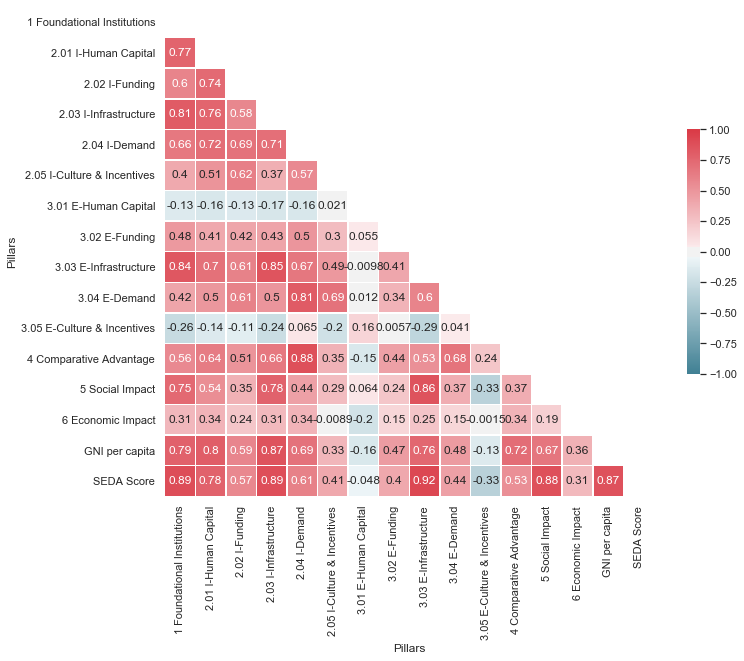

In [123]:
import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Correlación de métricas de colaboración con Impacto

Ahora, vamos a estudiar qué correlaciones tienen cada una de las métricas de colaboratividad con aquellas de impacto. 

Para ello, vamos a ordenar los datos de los pilares de impacto social y económico de:
* Argentina
* Brasil
* Chile
* España
* México
* Uruguay

Y vamos a leer la correlación de ambos impactos con cada una de las 11 métricas de colaboratividad con que contamos. Es decir, la métrica original y las 10 propuestas.

In [124]:
# primero conseguimos los datos de los 6 países estudiados
countries={'Mexico':'México',
          'Uruguay':'Uruguay',
          'Spain':'España',
          'Brazil':'Brasil',
          'Argentina':'Argentina',
          'Chile':'Chile'}
df_means_countries_studied = df_means.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)

df1 = df_means_countries_studied[['5 Social Impact', '6 Economic Impact', 'GNI per capita', 'SEDA Score']]

#luego conseguimos el dataframe donde se encuentra la vieja medida de impacto
df_before_impact_split = pd.read_csv('../PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'Impact Before'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['Impact Before']]

#now we obtain colaborativities for each city
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('../Ranking_cities.csv')
df3 = df3.loc[df3['Ciudad'].isin(capitals)]
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df = pd.concat([df1, df2, df3], axis=1)
df

,5 Social Impact,6 Economic Impact,GNI per capita,SEDA Score,Impact Before,Colab 0,Colab 1,Colab 2,Colab 3,Colab 4,...,Ranking Capitals 5,Ranking Capitals 6,Ranking Capitals 7,Ranking Capitals 8,Ranking Capitals 9,Ranking Capitals 10,Ranking Capitals 11,Ranking Capitals 12,Ranking Capitals 13,Ranking Capitals 14
México,3.916166,2.665218,1.440818,2.968,3.725455,3.636191,0.817118,-0.105809,0.252593,0.165183,...,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
Uruguay,4.489483,2.605598,1.772041,3.560,4.147576,8.471255,1.124532,0.452584,0.456651,0.387565,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
España,4.111115,2.675696,2.461763,3.900,3.864545,4.256043,0.853905,-0.064943,0.297935,0.201023,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Brasil,3.996738,2.389177,1.426206,2.972,3.671818,3.258518,0.793642,-0.188052,0.262453,0.168783,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
Argentina,3.984246,2.405071,1.527034,3.232,3.781818,5.773443,0.921857,0.114574,0.355051,0.252040,...,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
Chile,4.424643,2.676299,1.712616,3.504,4.091818,5.571009,0.956748,0.103005,0.360724,0.247697,...,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


In [125]:
impacts = ['5 Social Impact', '6 Economic Impact', 'Impact Before', 'GNI per capita', 'SEDA Score']
others = list(df.columns)
for i in impacts:
    others.remove(i)
    
significants = {x:[] for x in impacts}


df_correls = pd.DataFrame()
df_correls['Correl data'] = others
for i in impacts:
    booleans_i = []
    correls_i = []
    p_vals_i = []
    for c in others:
        triple = significant_corr(df,df,i,c)
        booleans_i.append(triple[0])
        correls_i.append(triple[1])
        p_vals_i.append(triple[2])
        if triple[0]==True:
            significants[i].append(c)
    df_correls['Significant with '+str(i)] = booleans_i
    df_correls['R^2 with '+str(i)] = correls_i
    df_correls['P-value with '+str(i)] = p_vals_i

    
df_correls       

,Correl data,Significant with 5 Social Impact,R^2 with 5 Social Impact,P-value with 5 Social Impact,Significant with 6 Economic Impact,R^2 with 6 Economic Impact,P-value with 6 Economic Impact,Significant with Impact Before,R^2 with Impact Before,P-value with Impact Before,Significant with GNI per capita,R^2 with GNI per capita,P-value with GNI per capita,Significant with SEDA Score,R^2 with SEDA Score,P-value with SEDA Score
0,Colab 0,False,0.779670,0.067470,False,0.125720,0.812414,True,0.828698,0.041503,False,0.098178,0.853207,False,0.425015,0.400864
1,Colab 1,True,0.846849,0.033387,False,0.204787,0.697114,True,0.884269,0.019315,False,0.114591,0.828866,False,0.446593,0.374646
2,Colab 2,False,0.778284,0.068287,False,0.162495,0.758402,True,0.833012,0.039499,False,0.081324,0.878283,False,0.407075,0.423115
3,Colab 3,True,0.825530,0.043004,False,0.098044,0.853405,True,0.857489,0.029017,False,0.129269,0.807176,False,0.469569,0.347415
4,Colab 4,False,0.795794,0.058293,False,0.101552,0.848196,True,0.823662,0.043901,False,0.113814,0.830016,False,0.428512,0.396574
5,Colab 5,True,0.984010,0.000381,False,0.364883,0.476965,True,0.974557,0.000963,False,0.144717,0.784439,False,0.487128,0.327105
6,Colab 6,False,0.792749,0.059978,False,0.043083,0.935416,True,0.813062,0.049152,False,0.087786,0.868659,False,0.412230,0.416681
7,Colab 7,False,0.690953,0.128506,False,0.231640,0.658754,False,0.798123,0.057018,False,0.090099,0.865218,False,0.417660,0.409938
8,Colab 8,False,0.742285,0.091068,False,0.221488,0.673200,True,0.827031,0.042290,False,0.110307,0.835210,False,0.434052,0.389810
9,Colab 9,False,0.750686,0.085488,False,0.178789,0.734674,True,0.826934,0.042336,False,0.075017,0.887686,False,0.410334,0.419043


## Correlación de iEcos con métricas de los grafos

Hacemos lo mismo de arriba, solo que esta vez incluiremos todas las métricas de los grafos, y todas las métricas de iEcosystems

In [105]:
# primero conseguimos los datos de los 6 países estudiados
countries={'Mexico':'México',
          'Uruguay':'Uruguay',
          'Spain':'España',
          'Brazil':'Brasil',
          'Argentina':'Argentina',
          'Chile':'Chile'}
df_means_countries_studied = df_means.loc[list(countries.keys()), :]
df_means_countries_studied.rename(index=countries, inplace=True)
df1 = df_means_countries_studied
#df1 = df_means_countries_studied[['5 Social Impact', '6 Economic Impact', 'GNI per capita', 'SEDA Score']]

#luego conseguimos el dataframe donde se encuentra la vieja medida de impacto
df_before_impact_split = pd.read_csv('../PromediosPilares.csv')
df_before_impact_split.rename(columns={'Unnamed: 0':'Country', '5 Impact':'Impact Before'}, inplace=True)
df_before_impact_split.set_index('Country', inplace=True)
df2=df_before_impact_split[['Impact Before']]

#now we obtain colaborativities for each city
capitals = ['CABA', 'CDMX', 'Santiago', 'Montevideo', 'Madrid', 'Sao Paulo']
df3 = pd.read_csv('../Ranking_cities.csv')
df3 = df3.loc[df3['Ciudad'].isin(capitals)]
df3 = df3.drop('Ciudad', axis=1)
df3.rename(columns={'País':'Country'}, inplace=True)
df3.set_index('Country', inplace=True)

#df1
#df2
#df3


#and finally we concatenate!
df = pd.concat([df1, df2, df3], axis=1)
df

,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,...,Ranking Capitals 2,Ranking Capitals 3,Ranking Capitals 4,Ranking Capitals 5,Ranking Capitals 6,Ranking Capitals 7,Ranking Capitals 8,Ranking Capitals 9,Ranking Capitals 10,Ranking Capitals 11
México,3.5224,2.363914,1.238062,2.782979,3.102667,2.5160,3.117368,2.299475,3.701600,3.4260,...,5.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0,5.0,5.0
Uruguay,3.7808,2.234182,1.464989,2.833698,2.578222,1.2428,3.046434,2.006702,3.926000,2.7408,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
España,3.9268,2.822386,1.899159,3.191020,3.077333,3.8300,3.189806,2.423851,4.264933,3.3650,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Brasil,3.1780,1.826706,1.662244,2.707140,2.879111,2.7542,2.975761,1.991287,3.694933,3.4638,...,6.0,5.0,5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0
Argentina,3.1684,2.051076,1.682002,2.740698,2.729778,1.7930,3.076940,1.725475,3.679067,3.1718,...,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
Chile,3.9124,2.413203,1.184934,3.100109,2.965778,1.9536,4.154179,2.207990,3.935067,3.2030,...,3.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0


In [106]:
for i in range(1,8):
    df = df.drop('Colab '+str(i), axis=1)
for i in range(12):
    df = df.drop('Ranking Capitals '+str(i), axis=1)
df

,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,...,5 Social Impact,6 Economic Impact,GNI per capita,SEDA Score,Impact Before,Colab 0,Colab 8,Colab 9,Colab 10,Colab 11
México,3.5224,2.363914,1.238062,2.782979,3.102667,2.5160,3.117368,2.299475,3.701600,3.4260,...,3.916166,2.665218,1.440818,2.968,3.725455,3.636191,0.308942,0.304868,0.397667,0.267167
Uruguay,3.7808,2.234182,1.464989,2.833698,2.578222,1.2428,3.046434,2.006702,3.926000,2.7408,...,4.489483,2.605598,1.772041,3.560,4.147576,8.471255,0.431910,0.385176,0.588490,0.360937
España,3.9268,2.822386,1.899159,3.191020,3.077333,3.8300,3.189806,2.423851,4.264933,3.3650,...,4.111115,2.675696,2.461763,3.900,3.864545,4.256043,0.316629,0.309405,0.426240,0.286349
Brasil,3.1780,1.826706,1.662244,2.707140,2.879111,2.7542,2.975761,1.991287,3.694933,3.4638,...,3.996738,2.389177,1.426206,2.972,3.671818,3.258518,0.269424,0.284577,0.384944,0.250892
Argentina,3.1684,2.051076,1.682002,2.740698,2.729778,1.7930,3.076940,1.725475,3.679067,3.1718,...,3.984246,2.405071,1.527034,3.232,3.781818,5.773443,0.364099,0.343969,0.492850,0.314246
Chile,3.9124,2.413203,1.184934,3.100109,2.965778,1.9536,4.154179,2.207990,3.935067,3.2030,...,4.424643,2.676299,1.712616,3.504,4.091818,5.571009,0.357342,0.340056,0.480988,0.311826


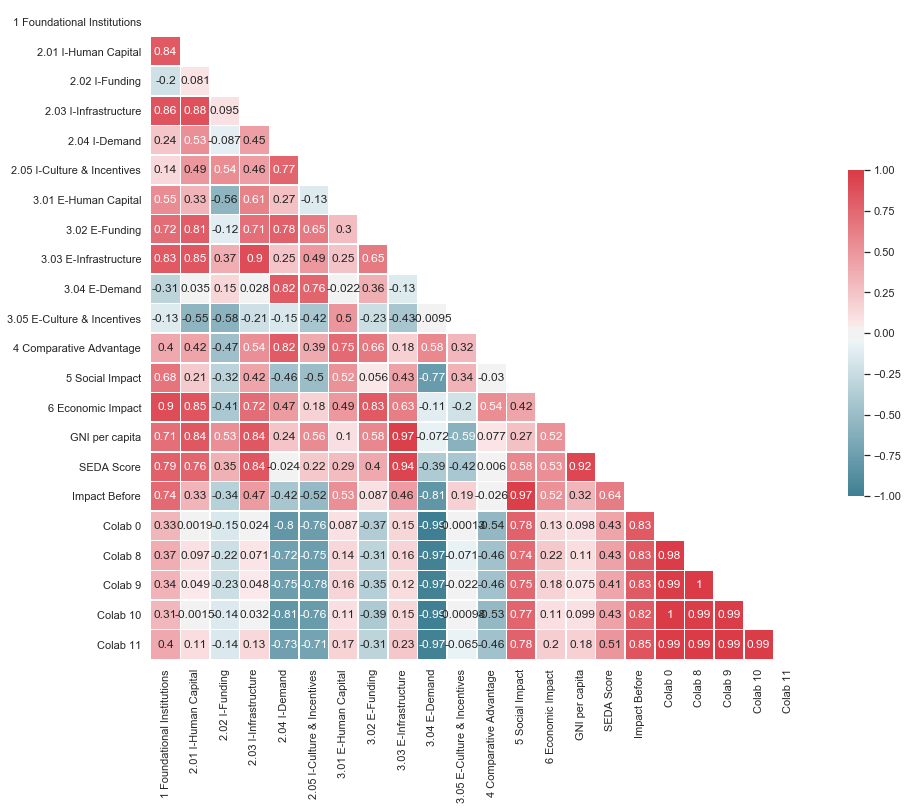

In [112]:
corr = df.corr()

import seaborn as sns
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap,annot=True,vmin=-1, vmax=1, center=0,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})

In [71]:
df_means


Pillars,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Social Impact,6 Economic Impact,GNI per capita,SEDA Score
Country,,,,,,,,,,,,,,,,
Albania,3.4732,2.205982,1.305845,2.598926,2.929778,1.5660,3.300371,2.041130,3.478800,2.3690,3.103957,2.074467,3.965401,2.738519,1.236727,3.172
Algeria,3.0096,2.195501,1.674710,2.383803,2.573333,2.4276,3.182732,1.738879,3.473333,3.2058,3.351067,2.399133,3.715319,2.324024,1.174866,2.724
Argentina,3.1684,2.051076,1.682002,2.740698,2.729778,1.7930,3.076940,1.725475,3.679067,3.1718,2.891282,2.583067,3.984246,2.405071,1.527034,3.232
Armenia,3.6344,2.238828,1.399669,2.837184,2.718222,1.3420,3.314949,2.167727,3.614267,2.6556,3.512472,2.593067,3.820191,3.070693,1.209450,3.012
Australia,4.3708,2.878032,2.064750,3.294983,3.268889,2.8508,3.752603,2.823880,4.229333,3.4370,3.047026,3.316533,4.440543,3.275445,3.656113,4.264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,4.3396,3.340008,1.967984,3.715226,3.709333,3.9660,2.853192,3.973914,4.286000,3.8236,3.156387,3.884867,4.134732,3.079245,3.045300,4.044
United States,4.2960,3.199162,3.764866,3.606783,4.223556,3.4960,3.722513,7.088756,4.288533,4.3330,3.506775,4.095000,3.863439,3.335960,4.184608,4.052
Uruguay,3.7808,2.234182,1.464989,2.833698,2.578222,1.2428,3.046434,2.006702,3.926000,2.7408,3.051111,2.482667,4.489483,2.605598,1.772041,3.560


In [33]:
df_means.rcorr()

Pillars,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Social Impact,6 Economic Impact,GNI per capita,SEDA Score
Pillars,,,,,,,,,,,,,,,,
1 Foundational Institutions,-,***,***,***,***,***,,***,***,***,**,***,***,**,***,***
2.01 I-Human Capital,0.772,-,***,***,***,***,,***,***,***,,***,***,***,***,***
2.02 I-Funding,0.601,0.739,-,***,***,***,,***,***,***,,***,***,*,***,***
2.03 I-Infrastructure,0.813,0.761,0.582,-,***,***,,***,***,***,*,***,***,**,***,***
2.04 I-Demand,0.662,0.725,0.688,0.709,-,***,,***,***,***,,***,***,***,***,***
2.05 I-Culture & Incentives,0.396,0.512,0.624,0.365,0.568,-,,**,***,***,*,***,**,,***,***
3.01 E-Human Capital,-0.131,-0.156,-0.134,-0.169,-0.163,0.021,-,,,,,,,*,,
3.02 E-Funding,0.477,0.406,0.419,0.425,0.503,0.296,0.055,-,***,***,,***,*,,***,***
3.03 E-Infrastructure,0.842,0.697,0.606,0.852,0.671,0.486,-0.01,0.407,-,***,**,***,***,*,***,***


In [34]:
#@title significance cheking { display-mode: "form" }

def check_corr_significance(df1, df2, a, b):
    r = stats.pearsonr(df1[a], df2[b])
    if r[1] < 0.05:
        return True, r[0], r[1]
    else:
        return False, r[0], r[1]


#print
def print_corr_significance(df1, df2, a, b):
    import scipy.stats as stats
    r = stats.pearsonr(df1[a], df2[b])
    print(f'Correlation between:  ' + a + '   and   ' + b)
    print('**********************************************')
    print(f'Pearson Correlation: {r[0]}, p-value: {r[1]}')
    if r[1] < 0.05:
        print('*Statistically significant*')
        print('**********************************************')
        print('')

        sns.lmplot(x=b, y=a, data=df1)
        return True, r[0], r[1]
    else:
        print('Not significant')
        print('**********************************************')
        print('')

        sns.lmplot(x=b, y=a, data=df1)
    return False, r[0], r[1]
  

Correlation between:  5 Social Impact   and   2.03 I-Infrastructure
**********************************************
Pearson Correlation: 0.7763098292271549, p-value: 1.433161695211522e-22
*Statistically significant*
**********************************************



(True, 0.7763098292271549, 1.433161695211522e-22)

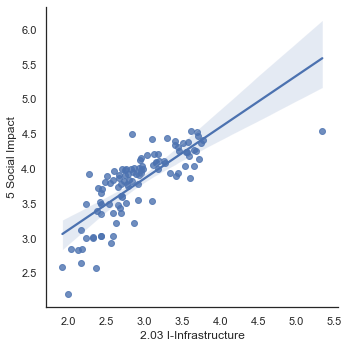

In [35]:
print_corr_significance(df_means, df_means,'5 Social Impact','2.03 I-Infrastructure')

In [36]:
#@title Función de spider plot
def make_spider_comparison(df,country_name1,country_name2):
    from math import pi
    categories=list(df)
    N = len(categories)
  
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    fig = plt.figure(figsize=(8, 8))
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
  
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories )
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([1,2,3,4,5], ["1","2","3","4",""], color="grey", size=13)
    plt.ylim(0,5)
  
  
    # ------- PART 2: Add plots
  
    # Plot each individual = each line of the data
    # I don't do a loop, because plotting more than 3 groups makes the chart unreadable
  
    # Ind1
    values=df.loc[country_name1].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name1)
    ax.fill(angles, values, 'b', alpha=0.1)
  
    # Ind2
    values=df.loc[country_name2].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country_name2)
    ax.fill(angles, values, 'r', alpha=0.1)
  
    # Add legend
    plt.legend( bbox_to_anchor=(0.05, 0.25))
    plt.tight_layout()

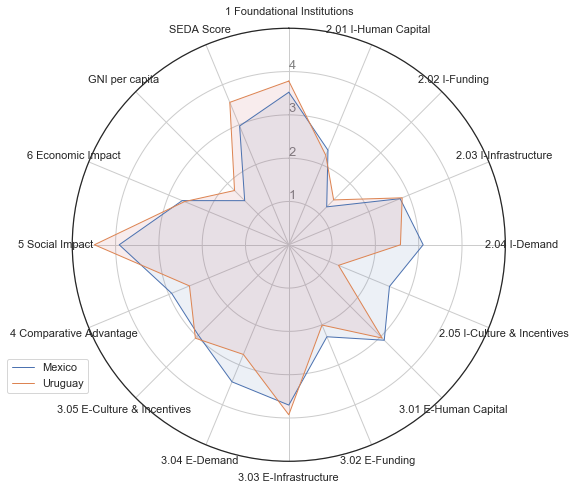

In [37]:
make_spider_comparison(df_means,'Mexico','Uruguay')

In [38]:
only_iecos = df_means.drop(['GNI per capita','SEDA Score'], axis = 1)
only_iecos

Pillars,1 Foundational Institutions,2.01 I-Human Capital,2.02 I-Funding,2.03 I-Infrastructure,2.04 I-Demand,2.05 I-Culture & Incentives,3.01 E-Human Capital,3.02 E-Funding,3.03 E-Infrastructure,3.04 E-Demand,3.05 E-Culture & Incentives,4 Comparative Advantage,5 Social Impact,6 Economic Impact
Country,,,,,,,,,,,,,,
Albania,3.4732,2.205982,1.305845,2.598926,2.929778,1.5660,3.300371,2.041130,3.478800,2.3690,3.103957,2.074467,3.965401,2.738519
Algeria,3.0096,2.195501,1.674710,2.383803,2.573333,2.4276,3.182732,1.738879,3.473333,3.2058,3.351067,2.399133,3.715319,2.324024
Argentina,3.1684,2.051076,1.682002,2.740698,2.729778,1.7930,3.076940,1.725475,3.679067,3.1718,2.891282,2.583067,3.984246,2.405071
Armenia,3.6344,2.238828,1.399669,2.837184,2.718222,1.3420,3.314949,2.167727,3.614267,2.6556,3.512472,2.593067,3.820191,3.070693
Australia,4.3708,2.878032,2.064750,3.294983,3.268889,2.8508,3.752603,2.823880,4.229333,3.4370,3.047026,3.316533,4.440543,3.275445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,4.3396,3.340008,1.967984,3.715226,3.709333,3.9660,2.853192,3.973914,4.286000,3.8236,3.156387,3.884867,4.134732,3.079245
United States,4.2960,3.199162,3.764866,3.606783,4.223556,3.4960,3.722513,7.088756,4.288533,4.3330,3.506775,4.095000,3.863439,3.335960
Uruguay,3.7808,2.234182,1.464989,2.833698,2.578222,1.2428,3.046434,2.006702,3.926000,2.7408,3.051111,2.482667,4.489483,2.605598


In [39]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(only_iecos)
print(f"La varianza explicada es: {np.sum(pca.explained_variance_ratio_)} %")


print('')
print('PCA explained variance ratio')
print(pca.explained_variance_ratio_)

La varianza explicada es: 0.7410334353707395 %

PCA explained variance ratio
[0.5190298  0.12437447 0.09762917]


In [40]:
Components_df = pd.DataFrame({
    "Component_1": pca.components_[0],
    "Component_2": pca.components_[1],
    "Component_3": pca.components_[2],
    "Pilar" : only_iecos.columns})
Components_df.set_index('Pilar',inplace=True)

Components_df

,Component_1,Component_2,Component_3
Pilar,,,
1 Foundational Institutions,0.263188,-0.233439,-0.118779
2.01 I-Human Capital,0.304955,-0.100963,-0.105197
2.02 I-Funding,0.359567,0.150507,0.004450
2.03 I-Infrastructure,0.306950,-0.294497,-0.186158
2.04 I-Demand,0.256675,-0.011934,0.062862
2.05 I-Culture & Incentives,0.400509,0.749521,-0.065620
3.01 E-Human Capital,-0.027286,0.084448,0.102591
3.02 E-Funding,0.295173,-0.208201,0.837067
3.03 E-Infrastructure,0.297779,-0.169043,-0.224122


In [41]:
#aquí podemos observar en el primer componente, cuáles métricas contribuyen más/menos
Components_df['Component_1'].sort_values(ascending=False)

Pilar
2.05 I-Culture & Incentives    0.400509
2.02 I-Funding                 0.359567
2.03 I-Infrastructure          0.306950
2.01 I-Human Capital           0.304955
3.03 E-Infrastructure          0.297779
3.02 E-Funding                 0.295173
4 Comparative Advantage        0.277632
3.04 E-Demand                  0.273870
1 Foundational Institutions    0.263188
2.04 I-Demand                  0.256675
5 Social Impact                0.226776
6 Economic Impact              0.082382
3.01 E-Human Capital          -0.027286
3.05 E-Culture & Incentives   -0.033092
Name: Component_1, dtype: float64

In [42]:
#mismo para el segundo componente
Components_df['Component_2'].sort_values(ascending=False)

Pilar
2.05 I-Culture & Incentives    0.749521
3.04 E-Demand                  0.228416
2.02 I-Funding                 0.150507
3.01 E-Human Capital           0.084448
3.05 E-Culture & Incentives   -0.001210
2.04 I-Demand                 -0.011934
2.01 I-Human Capital          -0.100963
4 Comparative Advantage       -0.142328
3.03 E-Infrastructure         -0.169043
6 Economic Impact             -0.199318
3.02 E-Funding                -0.208201
1 Foundational Institutions   -0.233439
5 Social Impact               -0.269802
2.03 I-Infrastructure         -0.294497
Name: Component_2, dtype: float64

In [43]:
#mismo, para el tercer componente
Components_df['Component_3'].sort_values(ascending=False)

Pilar
3.02 E-Funding                 0.837067
3.05 E-Culture & Incentives    0.179536
4 Comparative Advantage        0.124556
3.01 E-Human Capital           0.102591
2.04 I-Demand                  0.062862
3.04 E-Demand                  0.014057
2.02 I-Funding                 0.004450
6 Economic Impact             -0.021569
2.05 I-Culture & Incentives   -0.065620
2.01 I-Human Capital          -0.105197
1 Foundational Institutions   -0.118779
2.03 I-Infrastructure         -0.186158
3.03 E-Infrastructure         -0.224122
5 Social Impact               -0.349351
Name: Component_3, dtype: float64

In [44]:
Scores = pca.transform(only_iecos)
Score_df = pd.DataFrame({
    "Component_1":Scores[:,0],
    "Component_2": Scores[:,1],
    "Component_3": Scores[:,2],
    "Country" :df.index,
    "Region" :df['Region'],
    "Development" : df['Development Stage']
})

Score_df

KeyError: 'Region'

In [45]:
%pip install plotly==4.9.0
import plotly.express as px

Note: you may need to restart the kernel to use updated packages.


In [46]:
#fig = px.scatter_3d(Score_df, x='Component_1', y='Component_2', z='Component_3', color='Development', text='Country')
#fig.show()

## Buscando parejas de métricas correlacionadas significativamente

In [47]:
iecosystems_m=['1 Foundational Institutions', '2.01 I-Human Capital', '2.02 I-Funding', '2.03 I-Infrastructure', '2.04 I-Demand',
      '2.05 I-Culture & Incentives', '3.01 E-Human Capital', '3.02 E-Funding', '3.03 E-Infrastructure', '3.04 E-Demand', 
      '3.05 E-Culture & Incentives', '4 Comparative Advantage', '5 Impact']

global_m=['avg strength', 'weight', 'Degree', 'Weighted Degree', 'Eccentricidad', 'Clustering',
          'Diámetro', 'Radio', 'Camino más corto promedio', 'Transitividad', 'Eficiencia Global', 
          'Small Worldness', 'Core Ratio', 'Central Point Dominance', 'Spectral radius']

significant_pairs=[]
for a in iecosystems_m:
    for b in global_m:
        if check_corr_significance(df_graph_ieco, df_graph_ieco, a, b)[0]:
            significant_pairs.append((a,b))

significant_pairs


NameError: name 'df_graph_ieco' is not defined

In [ ]:
df_graph_ieco_with_detail = pd.concat([df_imputed,Graph_df], axis = 1)
df_graph_ieco_with_detail

In [ ]:
i_funding_components = ['2.02a R&D expenditure as a % GDP (UNESCO)',
                       '2.02b R&D expenditure in \'000 current PPP$ (UNESCO)',
                       '2.02c Public R&D Expenditure as % of total R&D expenditure (UNESCO)',
                       '2.02d Business Expenditure as % of total R&D expenditure (UNESCO)']

e_funding_components = ['3.02a VC investment',
                       '3.02b Financing of SME\'s (GCI 4.0)',
                       '3.02c Venture Capital Availability (GCI 4.0)',
                       '3.02d Ease of Credit (GII)',
                       '3.02e VC deals (GII)',
                       '3.02f Venture Capital Deal Volume']

comparative_advantage_components = ['4.01 State of cluster development (GCI 4.0)',
                                   '4.02 Country capacity to attract and retain talent']

impact_components = ['5.01 GDP per capita',
                    '5.02 Social Progress Index',
                    '5.03 Inclusive Development Index',
                    '5.04 Population below international poverty line (SDG 1 - No poverty)',
                    '5.05 Prevalence of undernourishment (SDG 2 - Zero Hunger)',
                    '5.06 Annual growth rate of real GDP per capita (SDG 8 - Decent Jobs and Economic Growth)',
                    '5.07 Unemployment rate of population 15 years of age and older (SDG 8 - Decent Jobs and Economic Growth)',
                    '5.08 Carbon dioxide emissions per unit of GDP (SDG 9 - Industry, Innovation and Infrastructure)',
                    '5.09 Proportion of urban population living in slums (SDG 11 - Sustainable Cities and Communities)',
                    '5.10 Annual population-weighted average mean concentration of fine suspended particles of less than 2.5 microns in diameter (SDG 11 - Sustainable Cities and Communities)',
                    '5.11 Domestic material consumption per capita (SDG 12 - Responsible Consumption and Production)']

collab_metrics = Graph_df.columns.values.tolist()
collab_metrics = collab_metrics[-16:]


In [ ]:
# ---
# correlations between I Funding and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in i_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    

In [ ]:
# ---
# correlations between E Funding and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in e_funding_components:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))


for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between I Funding and Impact
# ---


significant_positives = []
significant_negatives = []

for a in i_funding_components:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between E Funding and Impact
# ---


significant_positives = []
significant_negatives = []

for a in e_funding_components:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between Colaboration and Impact
# ---


significant_positives = []
significant_negatives = []

for a in collab_metrics:
    for b in impact_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
# ---
# correlations between Colaboration and Comparative Advantage
# ---


significant_positives = []
significant_negatives = []

for a in collab_metrics:
    for b in comparative_advantage_components:
        CORR = check_corr_significance(df_graph_ieco_with_detail,df_graph_ieco_with_detail,a,b)
        if CORR[0]:
            if CORR[1]>0:
                significant_positives.append((a,b))
            else:
                significant_negatives.append((a,b))

for a,b in significant_positives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)
    
for a,b in significant_negatives:
    print('')
    print_corr_significance(df_graph_ieco_with_detail,a,b)

In [ ]:
Graph_df

In [ ]:
#-------------------------------------------
# Scaling 1-5 parameters per country
#-------------------------------------------


negative_type_metrics = ['Eccentricidad', 'Diámetro', 'Radio', 
                         'Camino más corto promedio', 'Central Point Dominance', 'Spectral radius']

Graph_df_copy=Graph_df.copy()

mins = {metric: min(Graph_df[metric].to_list()) for metric in list(Graph_df)}
maxs = {metric: max(Graph_df[metric].to_list()) for metric in list(Graph_df)}


# Proceso de re-escalamiento de 0 a 1
for col in Graph_df_copy.columns:
    Graph_df_copy[col] = Graph_df_copy[col].apply(lambda x: (x-mins[col])/(maxs[col]-mins[col]))

# Rescalamiento de 1 a 5    
Graph_df_copy = np.round((Graph_df_copy*4)+1,2)

# Invertimos la escala de aquellas métricas de tipo negativo
for col in negative_type_metrics:
    Graph_df_copy[col] = Graph_df_copy[col].apply(lambda x: abs(5-x)+1)

Graph_df_copy


In [ ]:
#-------------------------------------------
# Spider Web visualization of each country
#-------------------------------------------

countries=['México', 'España', 'Uruguay', 'Brasil', 'Chile', 'Argentina']

for country1 in countries:
    for country2 in countries:
        if country1==country2:
            make_spider_comparison(Graph_df_copy,country1,country2)
            